In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
import warnings 
warnings.simplefilter(action='ignore',category = FutureWarning)

linear regression


In [3]:
df =pd.read_table('auto-mpg.data-original.txt', delim_whitespace=True, names=
                  ('mpg','cylinders','displacement','horsepower','weight','acceleration',
                   'year','origin','car name'))

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   year          406 non-null    float64
 7   origin        406 non-null    float64
 8   car name      406 non-null    object 
dtypes: float64(8), object(1)
memory usage: 28.7+ KB


In [7]:
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
car name        0
dtype: int64

In [8]:
df['mpg'] = df['mpg'].fillna(df['mpg'].median())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
car name        0
dtype: int64

In [10]:
ls = df.columns.tolist()
df[ls].isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
car name        0
dtype: int64

In [11]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
car name        0
dtype: int64

<AxesSubplot:xlabel='mpg', ylabel='Density'>

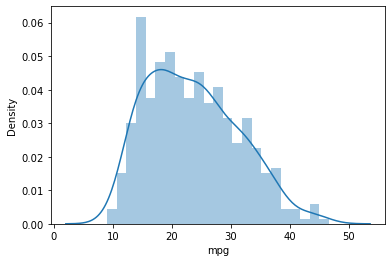

In [12]:
sns.distplot(df['mpg'],bins = 23)

<AxesSubplot:>

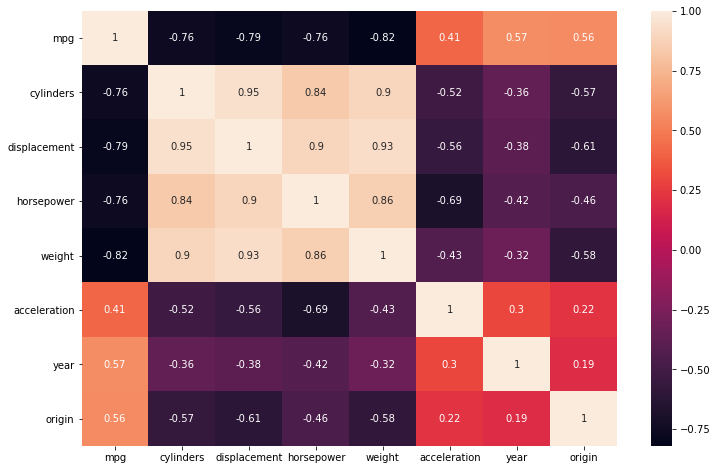

In [13]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr().round(2),annot = True)

In [14]:
X = df[['cylinders','displacement','weight']]
y = df['mpg']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.02,random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression

worst model ever

In [18]:
ln = LinearRegression()

In [19]:
ln.fit(X_train,y_train)

LinearRegression()

In [20]:
pred = ln.predict(X_test)

In [21]:
pred

array([12.52762771, 18.67644312, 18.32695361, 13.38103726, 20.73279415,
       12.30969018, 27.66528171, 28.67468736, 30.12460479])

In [22]:
y_test

70     14.0
218    16.5
258    20.2
33     11.0
42     17.0
77     13.0
137    26.0
333    43.4
245    33.5
Name: mpg, dtype: float64

In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
def errors(a,b):
    print('mean squared error')
    print(mean_squared_error(a,b))
    print('mean absoute error ')
    print(mean_absolute_error(a,b))
    print('root squared error')
    print(np.sqrt(a,b))
    

In [ ]:
errors(pred,y_test)

In [ ]:
df